<a href="https://colab.research.google.com/github/Prospkt/neural_net_stuff/blob/main/ID3_regressao_case_precodecasa_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Principais diferencas de classificacao pra regressao
#1 - tem apenas uma saida
#2 - funcao relu para iniciar e linear na saida
#3 - loss e MSE 

In [8]:
#escolhendo bibliotecas do collab
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



In [9]:
dados = read_csv('/content/RegressaoPrecodeCasa.csv', sep=";")  #aqui a separacao e por ponto e virgula
dados

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [16]:
X = dados.values[:,0:14]
y = dados.values[:,13]


In [13]:
# Geracao dos arquivos de treino, teste e validacao
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [31]:
# Geracao do modelo 
model = Sequential() #deeplearning
model.add(Dense(200, input_dim=14,activation= 'relu', kernel_initializer= 'normal')) # NEW!! usando relu para regressao e melhor esse iput_dim e diferente de input shade
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1, activation= 'linear'))  #NEW! Na regressao so tem uma possibilidade de saida 

In [32]:
# Compilacao do modelo 
model.compile(optimizer='adam', loss='mse')


In [33]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=1)

Epoch 1/30
13/13 [==============================] - 0s 13ms/step - loss: 128.4809 - val_loss: 74.7072
Epoch 2/30
13/13 [==============================] - 0s 4ms/step - loss: 59.0254 - val_loss: 52.5931
Epoch 3/30
13/13 [==============================] - 0s 15ms/step - loss: 54.5619 - val_loss: 46.8826
Epoch 4/30
13/13 [==============================] - 0s 5ms/step - loss: 46.2547 - val_loss: 37.6646
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 33.5806 - val_loss: 30.3201
Epoch 6/30
13/13 [==============================] - 0s 5ms/step - loss: 24.7349 - val_loss: 27.5168
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 22.5633 - val_loss: 20.6483
Epoch 8/30
13/13 [==============================] - 0s 4ms/step - loss: 15.6916 - val_loss: 10.3474
Epoch 9/30
13/13 [==============================] - 0s 4ms/step - loss: 8.4605 - val_loss: 6.3479
Epoch 10/30
13/13 [==============================] - 0s 4ms/step - loss: 4.3919 - val_loss: 3.9861


<function matplotlib.pyplot.legend>

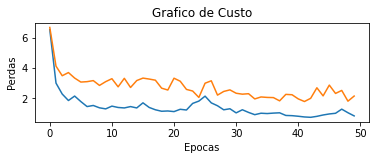

In [25]:
#GRAFICO - plot loss durante treinamenti=o
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'], label= 'Perdas durante os Treinamentos')
plt.plot(history.history['val_loss'], label= 'Perdas durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend